# **PROJECT : MEDICAL INSURANCE COST PREDICTION**

**Import required libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
df=pd.read_csv('/content/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


**Statistical measures of the dataset**

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

**Checking missing values**

In [8]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Distribution of age value**

<Figure size 600x600 with 0 Axes>

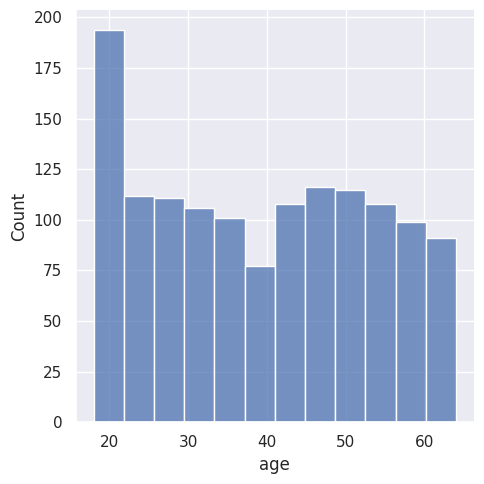

In [9]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['age'])
plt.show()

**Distribution of bmi**(normal bmi range-->18.5 to 24.9)

<Figure size 600x600 with 0 Axes>

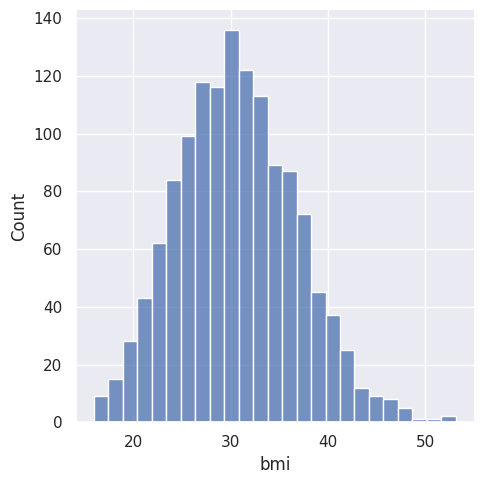

In [10]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['bmi'])
plt.show()

**Range of the children**

<Axes: xlabel='children', ylabel='count'>

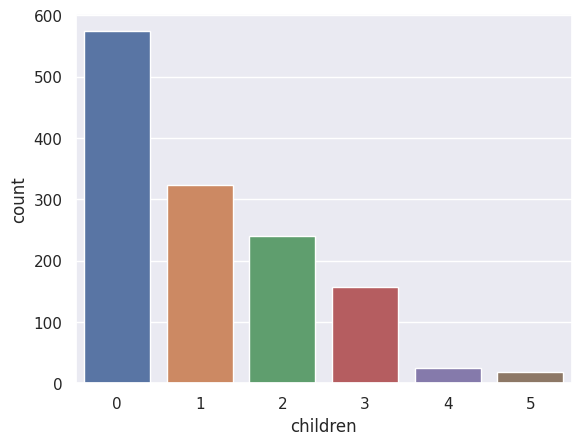

In [11]:
sns.countplot(x='children',data=df)

**Distribution of charges**

<Figure size 600x600 with 0 Axes>

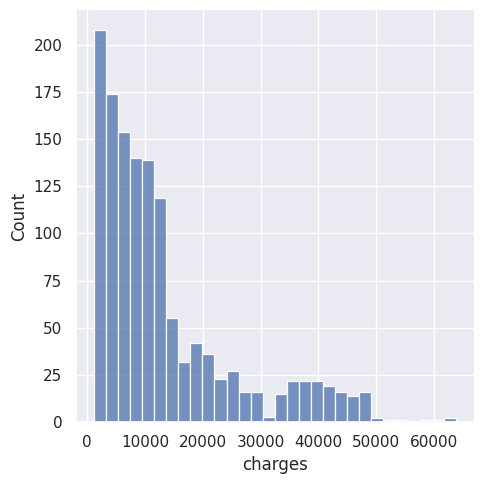

In [12]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['charges'])
plt.show()

**Range of gender**

<Axes: xlabel='sex', ylabel='count'>

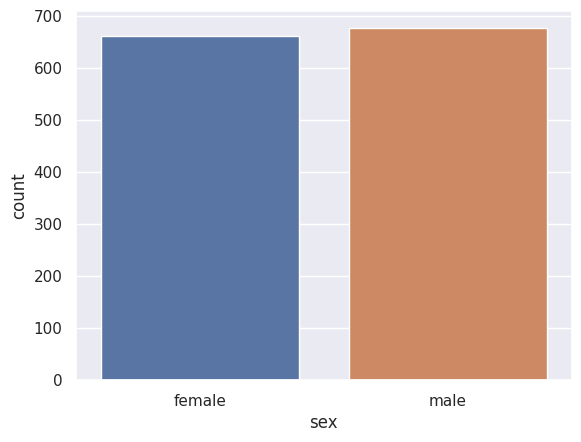

In [13]:
sns.countplot(x='sex',data=df)

**Range of smoker**

<Axes: xlabel='smoker', ylabel='count'>

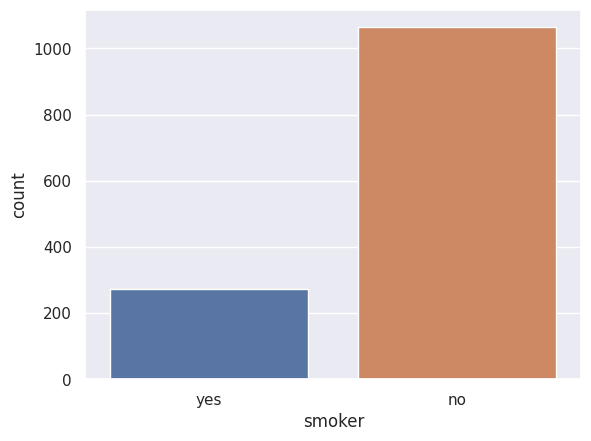

In [14]:
sns.countplot(x='smoker',data=df)

**Range of region**

<Axes: xlabel='region', ylabel='count'>

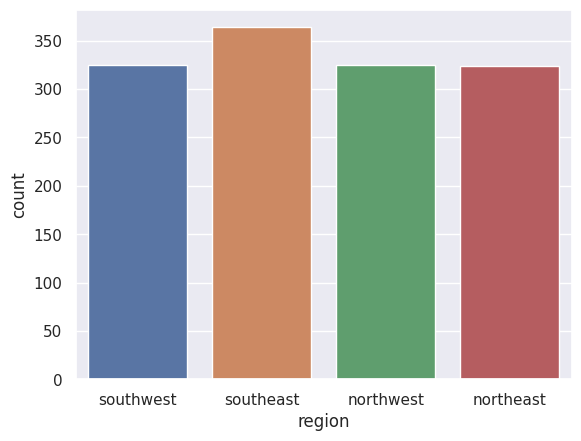

In [15]:
sns.countplot(x='region',data=df)

**Display Correlation of the data**

In [16]:
corr=df.corr()

<ipython-input-16-0014364bc22a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

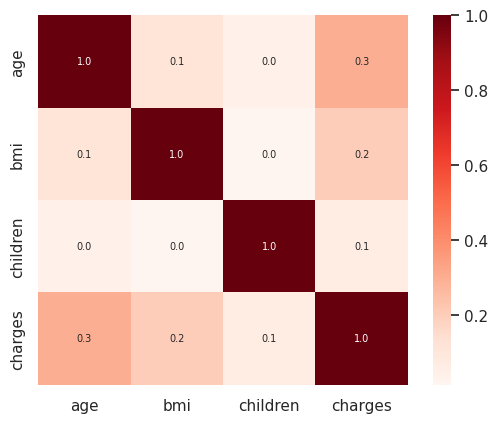

In [17]:
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':7},cmap='Reds')

**Remove unwanted column**

In [18]:
df.drop(['sex'],axis=1,inplace=True)
df.head()

,age,bmi,children,smoker,region,charges
0,19,27.900,0,yes,southwest,16884.92400
1,18,33.770,1,no,southeast,1725.55230
2,28,33.000,3,no,southeast,4449.46200
3,33,22.705,0,no,northwest,21984.47061
4,32,28.880,0,no,northwest,3866.85520


**Encoding columns using LabelEncoder**

In [19]:
col=['smoker','region']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in col:
  df[i]=le.fit_transform(df[i])
df.head()

,age,bmi,children,smoker,region,charges
0,19,27.900,0,1,3,16884.92400
1,18,33.770,1,0,2,1725.55230
2,28,33.000,3,0,2,4449.46200
3,33,22.705,0,0,1,21984.47061
4,32,28.880,0,0,1,3866.85520


**Separating the Input features and target**

In [20]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

<Axes: xlabel='age', ylabel='charges'>

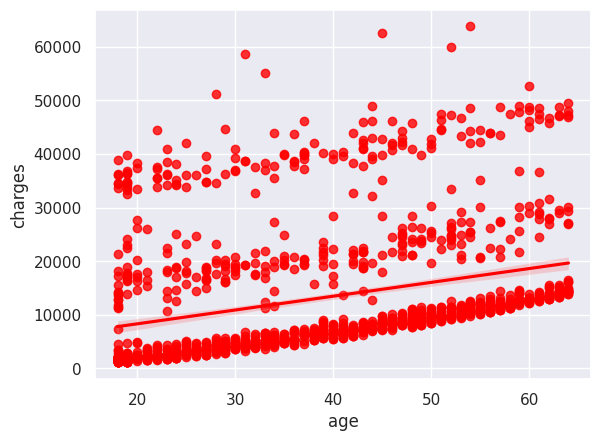

In [21]:
sns.regplot(x=df['age'],y=y,color='red')

<Axes: xlabel='children', ylabel='charges'>

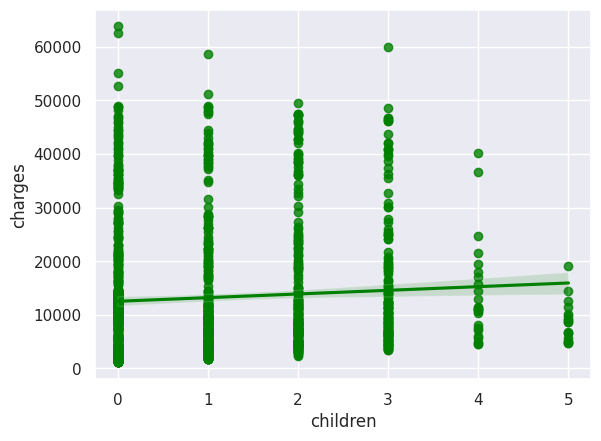

In [22]:
sns.regplot(x=df['children'],y=y,color='green')

<Axes: xlabel='smoker', ylabel='charges'>

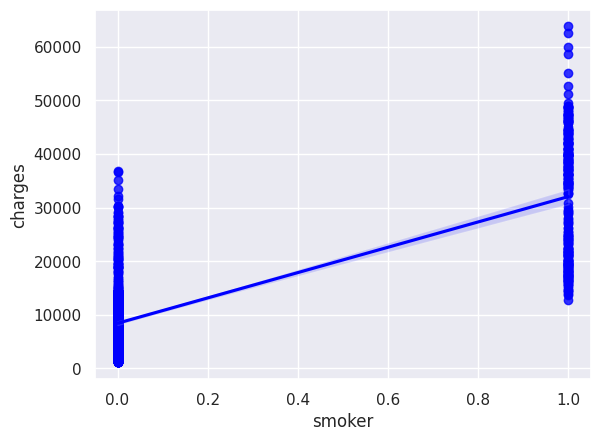

In [23]:
sns.regplot(x=df['smoker'],y=y,color='blue')

<Axes: xlabel='region', ylabel='charges'>

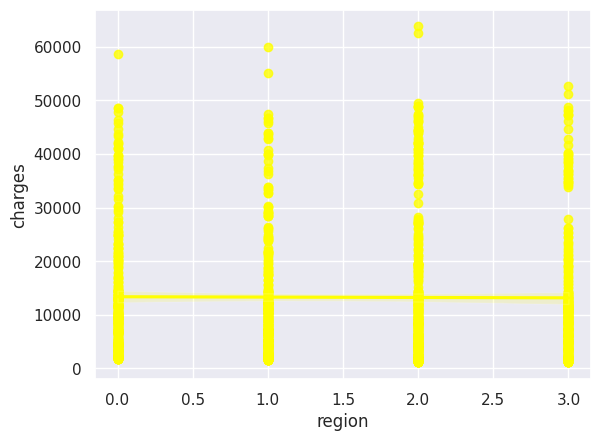

In [24]:
sns.regplot(x=df['region'],y=y,color='yellow')

**Training & Testing datat**

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,age,bmi,children,smoker,region
332,61,31.160,0,0,1
355,46,27.600,0,0,3
138,54,31.900,3,0,2
381,55,30.685,0,1,0
292,25,45.540,2,1,2
...,...,...,...,...,...
1095,18,31.350,4,0,0
1130,39,23.870,5,0,2
1294,58,25.175,0,0,0
860,37,47.600,2,1,3


In [26]:
x_test
y_train
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
701      9541.69555
672      4399.73100
1163     2200.83085
1103    11363.28320
1295     1964.78000
Name: charges, Length: 402, dtype: float64

**Model  Creation using**
- LinearRegression
- XGBRegressor

**LinearRegression**

In [27]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [28]:
import warnings
warnings.filterwarnings('ignore')

**Hyperparameter tuning**

In [29]:
parameter={'copy_X':[True,False],'fit_intercept':[True,False],'n_jobs':[None,1,5,7,6],'positive':[True,False]}
gsv=GridSearchCV(model,parameter,cv=10,scoring='accuracy')
gsv.fit(x_train,y_train)
print(gsv.best_params_)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': True}


**Model creation**

In [30]:
model1=LinearRegression(positive=True)
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
y_pred

array([ 8.57304317e+03,  6.96530195e+03,  3.68784227e+04,  9.45816118e+03,
        2.67738902e+04,  1.11691153e+04,  1.16340971e+01,  1.69260118e+04,
        6.26228370e+02,  1.12255951e+04,  2.84466923e+04,  9.33104502e+03,
        5.42221465e+03,  3.86209502e+04,  4.05103959e+04,  3.73126548e+04,
        1.54567379e+04,  3.61092578e+04,  9.36021299e+03,  3.13795780e+04,
        4.21063213e+03,  1.05248933e+04,  2.64055109e+03,  6.56179649e+03,
        1.12974026e+04,  1.25654609e+04,  1.49434052e+04,  6.03502727e+03,
        9.57184814e+03,  2.29201543e+03,  9.50555194e+03,  1.30659469e+04,
        4.65458145e+03,  3.33646965e+03,  4.77336244e+03,  1.25843406e+04,
        2.26384724e+03,  9.19146736e+03,  3.32509145e+04,  3.27521381e+04,
        4.20654823e+03,  4.17606339e+03,  1.45626174e+04,  1.14675085e+04,
        8.95662901e+03,  1.25808856e+04,  5.10760849e+03,  3.47754292e+03,
        3.57082621e+04,  9.31312494e+03,  1.61290432e+04,  2.46851785e+03,
        1.22467709e+04,  

**Find errors**

In [31]:
df2=pd.DataFrame({'act_value':y_test,'pred_value':y_pred,'diff':y_test-y_pred})
df2

,act_value,pred_value,diff
764,9095.06825,8573.043172,522.025078
887,5272.17580,6965.301952,-1693.126152
890,29330.98315,36878.422668,-7547.439518
1293,9301.89355,9458.161185,-156.267635
259,33750.29180,26773.890193,6976.401607
...,...,...,...
701,9541.69555,15540.621676,-5998.926126
672,4399.73100,6858.611599,-2458.880599
1163,2200.83085,1650.206275,550.624575
1103,11363.28320,14746.444903,-3383.161703


**Slop and Constant**

In [32]:
print('slope',model1.coef_)
list(zip(x,model1.coef_))

slope [  261.84974458   333.40735476   433.22607604 23626.55992417
     0.        ]


[('age', 261.84974458081416),
 ('bmi', 333.40735476455393),
 ('children', 433.22607603996056),
 ('smoker', 23626.559924170022),
 ('region', 0.0)]

In [33]:
print('constant',model1.intercept_)

constant -12470.17764244125


**Performance Evaluation(errors)**

In [34]:
from sklearn.metrics import mean_absolute_percentage_error
print('MAPE',mean_absolute_percentage_error(y_test,y_pred))

MAPE 0.44370425073706254


In [35]:
from sklearn.metrics import r2_score
r0=r2_score(y_test,y_pred)
print('R2_SCORE: ',r0)

R2_SCORE:  0.7684636242828375


**XGBRegressor**

In [36]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
y_pred1=xgb.predict(x_test)
y_pred1

array([9.52334570e+03, 8.06327979e+03, 3.13977070e+04, 1.07308838e+04,
       3.39382695e+04, 6.38753174e+03, 1.13572095e+03, 1.82332461e+04,
       4.02280713e+03, 9.51315430e+03, 2.11704648e+04, 8.86125293e+03,
       4.11326660e+03, 4.39384258e+04, 4.62864609e+04, 4.40154766e+04,
       1.13828896e+04, 4.04626562e+04, 1.16113828e+04, 2.79625430e+04,
       5.55349023e+03, 1.20575332e+04, 8.47581421e+02, 2.45332690e+03,
       1.10869121e+04, 1.18869639e+04, 1.65009492e+04, 5.06759375e+03,
       8.47929590e+03, 4.90773779e+03, 8.04584180e+03, 1.10806523e+04,
       3.84552612e+03, 4.78501318e+03, 2.18234497e+03, 1.21370762e+04,
       1.60209680e+03, 6.78743604e+03, 2.59525762e+04, 3.76482227e+04,
       4.08998877e+03, 2.33607056e+03, 1.11583770e+04, 1.59356611e+04,
       9.39409766e+03, 1.34254561e+04, 1.17853887e+04, 6.57474463e+03,
       4.29970547e+04, 5.18621240e+03, 1.37294277e+04, 5.08607373e+03,
       4.90570215e+03, 1.74003552e+03, 1.07341455e+04, 1.13189268e+04,
      

**Find errors**

In [37]:
df5=pd.DataFrame({'act_value':y_test,'pred_value':y_pred1,'diff':y_test-y_pred1})
df5

,act_value,pred_value,diff
764,9095.06825,9523.345703,-428.277453
887,5272.17580,8063.279785,-2791.103985
890,29330.98315,31397.707031,-2066.723881
1293,9301.89355,10730.883789,-1428.990239
259,33750.29180,33938.269531,-187.977731
...,...,...,...
701,9541.69555,12957.550781,-3415.855231
672,4399.73100,3401.469727,998.261273
1163,2200.83085,6531.092285,-4330.261435
1103,11363.28320,11321.374023,41.909177


**Performance Evaluation(errors)**

In [38]:
from sklearn.metrics import mean_absolute_percentage_error
print('MAPE',mean_absolute_percentage_error(y_test,y_pred1))

MAPE 0.34695884064976007


In [39]:
from sklearn.metrics import r2_score
r1=r2_score(y_test,y_pred1)
print('R2 SCORE: ',r1)

R2 SCORE:  0.8289643757716001


**Visualize model comparison**

<function matplotlib.pyplot.show(close=None, block=None)>

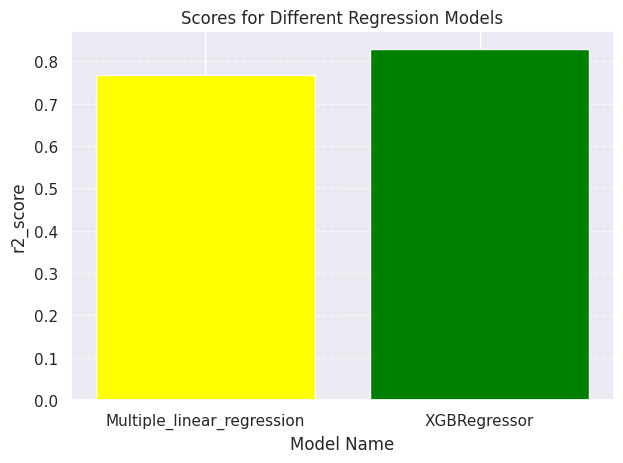

In [40]:
visual=['Multiple_linear_regression','XGBRegressor']
result=[r0,r1]
plt.bar(visual,result,color=['yellow','green'])
plt.xlabel('Model Name')
plt.ylabel('r2_score')
plt.title('Scores for Different Regression Models')
plt.tight_layout() #ensure labels are not cut off
#plt.xticks(rotation=35)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show